# Random Forest para Identificar periodos importantes
Prof. Fernando Amaral

In [37]:
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot
from pandas import Series

In [38]:
d = read_csv( "AirPassengers.csv", header=0, parse_dates=[0], index_col=0, squeeze=True)
d

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
             ... 
1960-08-01    606
1960-09-01    508
1960-10-01    461
1960-11-01    390
1960-12-01    432
Name: #Passengers, Length: 144, dtype: int64

In [43]:
differenced = d.diff(12)
differenced.head(n=13)

Month
1949-01-01    NaN
1949-02-01    NaN
1949-03-01    NaN
1949-04-01    NaN
1949-05-01    NaN
1949-06-01    NaN
1949-07-01    NaN
1949-08-01    NaN
1949-09-01    NaN
1949-10-01    NaN
1949-11-01    NaN
1949-12-01    NaN
1950-01-01    3.0
Name: #Passengers, dtype: float64

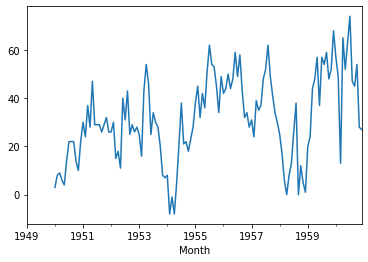

In [45]:
differenced.plot()
pyplot.show()

In [46]:
differenced = differenced[12:]

In [47]:
differenced.head(n=13)

Month
1950-01-01     3.0
1950-02-01     8.0
1950-03-01     9.0
1950-04-01     6.0
1950-05-01     4.0
1950-06-01    14.0
1950-07-01    22.0
1950-08-01    22.0
1950-09-01    22.0
1950-10-01    14.0
1950-11-01    10.0
1950-12-01    22.0
1951-01-01    30.0
Name: #Passengers, dtype: float64

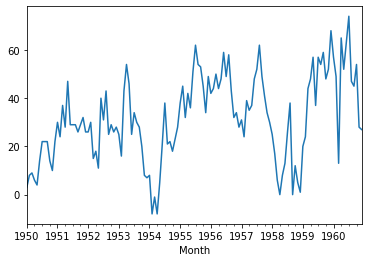

In [48]:
differenced.plot()
pyplot.show()

In [28]:
dataframe = pd.DataFrame()
for i in range(12,0,-1):
    dataframe['t-'+str(i)] = differenced.shift(i)
    dataframe['t'] = differenced.values
print(dataframe.head(13))
dataframe = dataframe[13:]

            t-12     t  t-11  t-10  t-9  t-8   t-7   t-6   t-5   t-4   t-3  \
Month                                                                        
1950-01-01   NaN   3.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1950-02-01   NaN   8.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1950-03-01   NaN   9.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   NaN   
1950-04-01   NaN   6.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   NaN   3.0   
1950-05-01   NaN   4.0   NaN   NaN  NaN  NaN   NaN   NaN   NaN   3.0   8.0   
1950-06-01   NaN  14.0   NaN   NaN  NaN  NaN   NaN   NaN   3.0   8.0   9.0   
1950-07-01   NaN  22.0   NaN   NaN  NaN  NaN   NaN   3.0   8.0   9.0   6.0   
1950-08-01   NaN  22.0   NaN   NaN  NaN  NaN   3.0   8.0   9.0   6.0   4.0   
1950-09-01   NaN  22.0   NaN   NaN  NaN  3.0   8.0   9.0   6.0   4.0  14.0   
1950-10-01   NaN  14.0   NaN   NaN  3.0  8.0   9.0   6.0   4.0  14.0  22.0   
1950-11-01   NaN  10.0   NaN   3.0  8.0  9.0   6.0   4.0  14.0  

In [29]:
from sklearn.ensemble import RandomForestRegressor

In [30]:
array = dataframe.values
# split into input and output
X = array[:,0:-1]
y = array[:,-1]

In [31]:
model = RandomForestRegressor(n_estimators=500, random_state=1)
model.fit(X, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=1, verbose=0,
                      warm_start=False)

In [32]:
#mostra a importancia, a segunda é a mais importante
print(model.feature_importances_)

[0.0249511  0.37561103 0.01541998 0.0167022  0.01435688 0.02521651
 0.02093459 0.02271564 0.02462942 0.05339896 0.12840096 0.27766272]


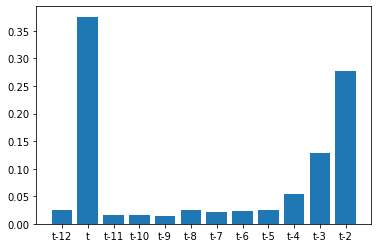

In [33]:
names = dataframe.columns.values[0:-1]
ticks = [i for i in range(len(names))]
pyplot.bar(ticks, model.feature_importances_)
pyplot.xticks(ticks, names)
pyplot.show()

In [34]:
from sklearn.feature_selection import RFE

In [35]:
rfe = RFE(RandomForestRegressor(n_estimators=500, random_state=1), 4)
fit = rfe.fit(X, y)

In [36]:
names = dataframe.columns.values[0:-1]
for i in range(len(fit.support_)):
    if fit.support_[i]:
        print(names[i])

t
t-4
t-3
t-2
